## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [107]:
%pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtestdata = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [109]:
# Ваш код здесь
# посмотрим тип полей
Xtrain.dtypes

f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64
f12         int64
f13         int64
f14       float64
target      int64
dtype: object

In [110]:
# посмотрим еще раз инофрмацию - посмотрим пропуски
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [111]:
# функция для вывода информации оо пропусках
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))

In [112]:
print_useful_rows_info(Xtrain)

Количество полностью заполненных объектов из всей выборки: 5567
Процент полностью заполненных объектов из всей выборки: 74.23


In [113]:
Xtrain[Xtrain.f7.isna()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
15,62,218.593930,121319,0.408246,13,0.445026,NaN,0.444334,25.606721,0.300298,3103.0,0,40,0.244418,1
23,53,218.593930,167170,0.171817,9,0.066372,NaN,0.103024,12.464986,0.113590,0.0,0,40,0.244418,0
28,54,218.593930,285854,0.171817,9,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,40,0.244418,1
34,29,218.593930,133937,0.726190,16,0.049127,NaN,0.009499,25.606721,0.300298,0.0,0,40,0.244418,0
37,37,218.593930,227545,0.179322,10,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,44,0.244418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,36,218.593930,118909,0.239316,12,0.049127,NaN,0.066581,12.464986,0.113590,0.0,0,40,0.227273,0
7468,64,386.473430,199298,0.104575,4,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,30,0.185185,0
7473,26,218.593930,270276,0.171817,9,0.049127,NaN,0.103024,25.606721,0.113590,0.0,0,40,0.244418,0
7479,69,114.416476,171050,0.171817,9,0.066372,NaN,0.103024,25.606721,0.113590,0.0,0,9,0.244418,0


In [114]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


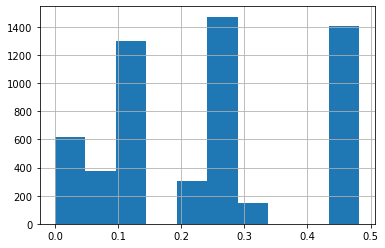

In [115]:
# гистограмму значений f7 без учета пропусков
import matplotlib.pyplot as plt
Xtrain['f7'].dropna().hist()
plt.show()

Пропусков в f7: 1875


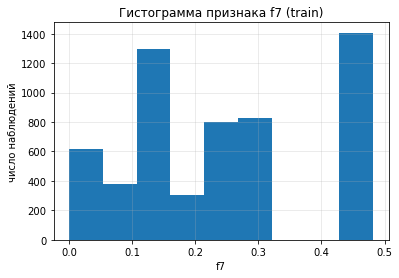

In [116]:

# Считаем, сколько пропусков
n_missing = Xtrain['f7'].isna().sum()
print(f'Пропусков в f7: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f7']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=9)     # количество корзин равно 9 - по дефолту
)

plt.xlabel('f7')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f7 (train)')
plt.grid(True, alpha=.3)
plt.show()

In [117]:
#Заполняю пропуски средним значением
mean_f7 = Xtrain['f7'].mean()          # считаем среднее только по непустым
Xtrain['f7'] = Xtrain['f7'].fillna(mean_f7)

Пропусков в f7: 0


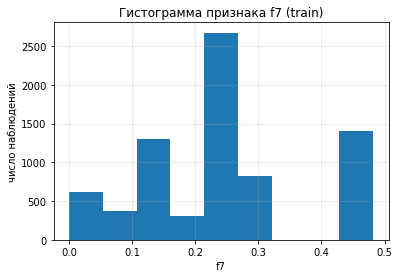

In [118]:
n_missing = Xtrain['f7'].isna().sum()
print(f'Пропусков в f7: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f7']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=9)    # количество корзин подберите под задачу
)

plt.xlabel('f7')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f7 (train)')
plt.grid(True, alpha=.3)
plt.show()

Пропусков в f2: 75


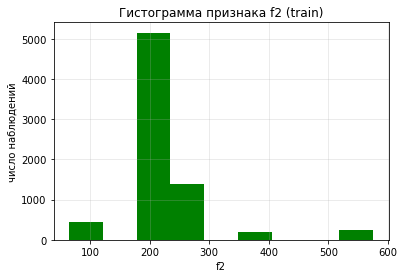

In [119]:
# Считаем, сколько пропусков
n_missing = Xtrain['f2'].isna().sum()
print(f'Пропусков в f2: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f2']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=9, color='g')  
)

plt.xlabel('f2')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f2 (train)')
plt.grid(True, alpha=.3)
plt.show()

In [120]:
# здесь тоже заполняем пропуски средним значением
mean_f2 = Xtrain['f2'].mean()          # считаем среднее только по непустым
Xtrain['f2'] = Xtrain['f2'].fillna(mean_f2)

Пропусков в f2: 0


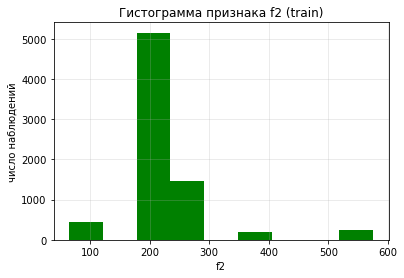

In [121]:
# Считаем, сколько пропусков
n_missing = Xtrain['f2'].isna().sum()
print(f'Пропусков в f2: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f2']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=9, color='g')  
)

plt.xlabel('f2')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f2 (train)')
plt.grid(True, alpha=.3)
plt.show()

Пропусков в f11: 10


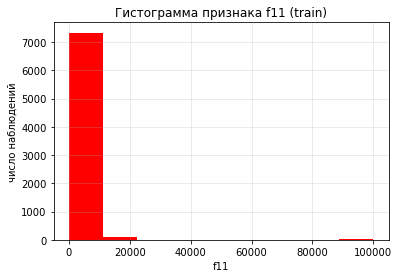

In [122]:
# Считаем, сколько пропусков
n_missing = Xtrain['f11'].isna().sum()
print(f'Пропусков в f11: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f11']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=9, color='r')  
)

plt.xlabel('f11')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f11 (train)')
plt.grid(True, alpha=.3)
plt.show()

In [123]:
# удалим строки с невалидным f11
Xtrain = Xtrain.dropna(subset=['f11'])

In [124]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7490.000000,7490.000000,7.490000e+03,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000,7490.000000
mean,38.571696,238.945126,1.904174e+05,0.238877,10.082377,0.238967,0.240563,0.238962,23.891711,0.238901,1068.693992,89.093725,40.670494,0.238931,0.238852
std,13.644897,75.835088,1.058984e+05,0.151658,2.545727,0.190282,0.127654,0.193371,4.453945,0.087719,7430.344770,404.773941,12.334311,0.041683,0.426410
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180590e+05,0.171817,9.000000,0.049127,0.131370,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.240556,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,238.905308,2.394472e+05,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


#### 2.2  Смотрим Xtest

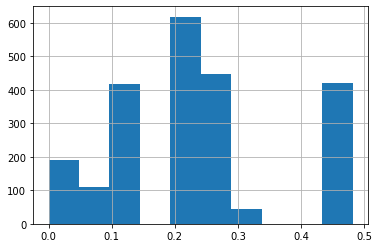

In [125]:
# посмотрим Xtest
Xtest['f7'].dropna().hist()
plt.show()

In [126]:
# посмотрим пропуски
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 7235 to 6596
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2247 non-null   int64  
 1   f2      2247 non-null   float64
 2   f3      2247 non-null   int64  
 3   f4      2247 non-null   float64
 4   f5      2247 non-null   int64  
 5   f6      2247 non-null   float64
 6   f7      2247 non-null   float64
 7   f8      2247 non-null   float64
 8   f9      2247 non-null   float64
 9   f10     2247 non-null   float64
 10  f11     2247 non-null   float64
 11  f12     2247 non-null   int64  
 12  f13     2247 non-null   int64  
 13  f14     2247 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 263.3 KB


### Xtest - пропусков нет

### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [127]:
# Ваш код здесь
print(Xtrain['target'].value_counts(normalize=True))

0    0.761148
1    0.238852
Name: target, dtype: float64


**Вывод**:
для задачи бинарной классификации метрика accuracy не подходит.  Лучше использовать F1-score 

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

#### 3.1 Разбиваем данные

In [128]:
from sklearn.model_selection import train_test_split
# разбиваем данные на train и test
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain.drop('target', axis=1), Xtrain['target'], train_size=0.7, random_state=123)
##Ttrain, Ttest, ytrain, yval = train_test_split(Xtest.drop('target', axis=1), Xtest['target'], train_size=0.7, random_state=123)

#### 3.2  Обучение методом k ближайших соседей

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()#n_neighbors=7)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [130]:
from sklearn.metrics import f1_score

In [131]:
print('accuracy для обучающей выборки:', knn.score(Xtrain, ytrain))
print('accuracy для тестовой выборки:', knn.score(Xtest, ytest))

accuracy для обучающей выборки: 0.8247186725157353
accuracy для тестовой выборки: 0.7765910102358701


In [132]:
# Расчёт F1-меры
f1_train = f1_score(ytrain, knn.predict(Xtrain))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, knn.predict(Xtest))
print("F1-test:", f1_test)

F1-train: 0.5008147745790331
F1-test: 0.31232876712328766


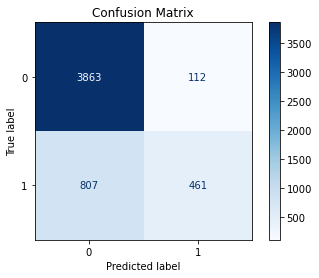

In [133]:
# Матрица сопряженности
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train=confusion_matrix(ytrain, knn.predict(Xtrain))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#### 3.3 Логистическая регрессия

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [136]:
from sklearn.metrics import accuracy_score
predictions = logreg.predict(Xtrain)
print(f'accuracy_score ={accuracy_score(ytrain, predictions)}')

accuracy_score =0.7999237078008774


In [137]:
test_pred = logreg.predict(Xtest)
print(f'test accuracy_score ={accuracy_score(ytest, test_pred)}')

test accuracy_score =0.7997329773030708


In [138]:
# Расчёт F1-меры
f1_train = f1_score(ytrain, logreg.predict(Xtrain))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, logreg.predict(Xtest))
print("F1-test:", f1_test)

F1-train: 0.38762405137186223
F1-test: 0.37499999999999994


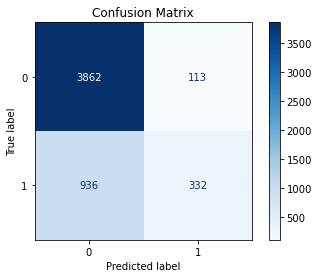

In [139]:
cm_train=confusion_matrix(ytrain, logreg.predict(Xtrain))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=logreg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#### 3.3  Классификатор  через метод опорных векторов

In [140]:
from sklearn.svm import SVC

In [141]:
model_svc=SVC()
model_svc.fit(Xtrain, ytrain)

SVC()

In [142]:
predictions = model_svc.predict(Xtrain)
print(f'accuracy_score ={accuracy_score(ytrain, predictions)}')

accuracy_score =0.7652107572000763


In [143]:
test_pred = model_svc.predict(Xtest)
print(f'test accuracy_score ={accuracy_score(ytest, test_pred)}')

test accuracy_score =0.7734757454383623


In [144]:
# Расчёт F1-меры
f1_train = f1_score(ytrain, model_svc.predict(Xtrain))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, model_svc.predict(Xtest))
print("F1-test:", f1_test)

F1-train: 0.062452399086062454
F1-test: 0.04859813084112149


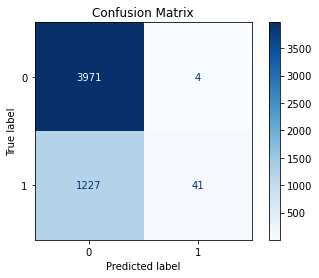

In [145]:
cm_train=confusion_matrix(ytrain, model_svc.predict(Xtrain))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_svc.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

#### 4.1  KNN

In [146]:
# попробуем нормализовать фичи

from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
scaler.fit(Xtrain)

StandardScaler()

In [148]:
# применяем трансформацию
X_train_norm = pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
X_test_norm = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

In [149]:
knn = KNeighborsClassifier()
knn.fit(X_train_norm, ytrain)

KNeighborsClassifier()

In [150]:
print('accuracy для обучающей выборки:', knn.score(X_train_norm, ytrain))
print('accuracy для тестовой выборки:', knn.score(X_test_norm, ytest))

accuracy для обучающей выборки: 0.8806027083730689
accuracy для тестовой выборки: 0.8059635068980864


In [151]:
# расчёт F1-меры
f1_train = f1_score(ytrain, knn.predict(X_train_norm))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, knn.predict(X_test_norm))
print("F1-test:", f1_test)

F1-train: 0.7376362112321878
F1-test: 0.5622489959839359


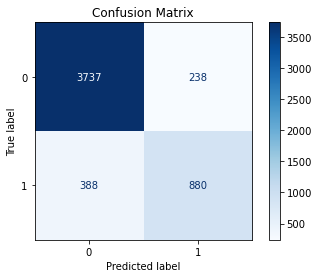

In [152]:
cm_train=confusion_matrix(ytrain, knn.predict(X_train_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Вывод**:\
Нормализация признаков улучшила значения F1-меры на обучающей и тестовой выборках

**Используем взвешивание**

In [153]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train_norm, ytrain)

KNeighborsClassifier(weights='distance')

In [154]:
print('accuracy для обучающей выборки:', knn.score(X_train_norm, ytrain))
print('accuracy для тестовой выборки:', knn.score(X_test_norm, ytest))

accuracy для обучающей выборки: 1.0
accuracy для тестовой выборки: 0.8072986203827325


In [155]:
# Расчёт F1-меры
f1_train = f1_score(ytrain, knn.predict(X_train_norm))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, knn.predict(X_test_norm))
print("F1-test:", f1_test)

F1-train: 1.0
F1-test: 0.5639476334340382


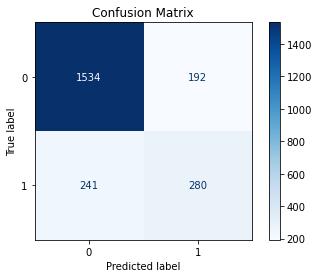

In [156]:
cm_test=confusion_matrix(ytest, knn.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Вывод**:\
Взвешивание переобучило модель на обучающей вборке, но не улучшило обобщающее свойство на тестовой выборке

**Попробуем подобрать параметр K со взвешиванием**

In [157]:
score_list=[]
f1_test = []
f1_train=[]
for k in range(3, 41, 2):
  knn = KNeighborsClassifier(n_neighbors=k,  weights='distance')
  knn.fit(X_train_norm, ytrain)
  accuracy=knn.score(X_test_norm, ytest)
  score_list.append([k, accuracy])
  f1 = f1_score(ytrain, knn.predict(X_train_norm))
  f1_train.append([k, f1])

  f1 = f1_score(ytest, knn.predict(X_test_norm))
  f1_test.append([k, f1])   

**График accuracy на тестовой выборке**

In [158]:
score_df = pd.DataFrame(score_list, columns=['k', 'score'])

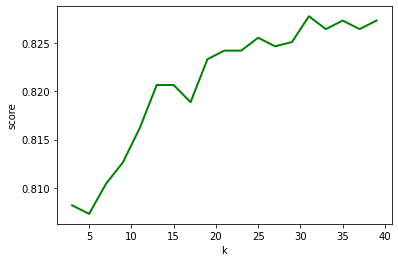

In [159]:
plt.plot(score_df['k'], score_df['score'], linewidth=2, color='g')
plt.xlabel('k')
plt.ylabel('score')
plt.show()

**График F1 на тестовой выборке**

In [160]:
f1_test_df = pd.DataFrame(f1_test, columns=['k', 'F1'])

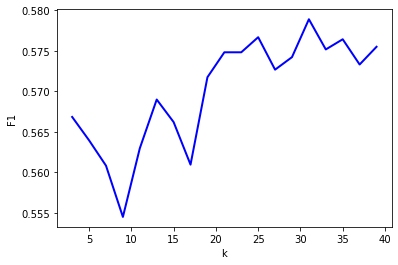

In [161]:
plt.plot(f1_test_df['k'], f1_test_df['F1'], linewidth=2, color='b')
plt.xlabel('k')
plt.ylabel('F1')
plt.show()

**Проверим на k=30 - тут лучшие результаты на тестовой выборке**

In [162]:
knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
knn.fit(X_train_norm, ytrain)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [163]:
print('accuracy для обучающей выборки:', knn.score(X_train_norm, ytrain))
print('accuracy для тестовой выборки:', knn.score(X_test_norm, ytest))

accuracy для обучающей выборки: 1.0
accuracy для тестовой выборки: 0.829105473965287


In [164]:
# Расчёт F1-меры
f1_train = f1_score(ytrain, knn.predict(X_train_norm))
print("F1-train:", f1_train)
f1_test = f1_score(ytest, knn.predict(X_test_norm))
print("F1-test:", f1_test)

F1-train: 1.0
F1-test: 0.5816993464052287


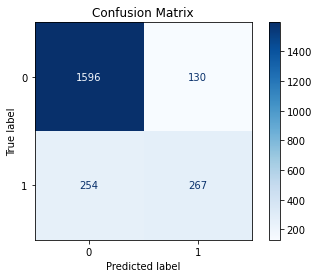

In [165]:
cm_test=confusion_matrix(ytest, knn.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#### 4.2 LogisticRegression

In [166]:
# применим регуляризацию через GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Логистическая регрессия с балансировкой классов
logreg = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

# Сетка гиперпараметров
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Подбор через GridSearchCV
grid = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='f1',   # оптимизация по F1
    cv=5,
    n_jobs=-1
)

grid.fit(Xtrain, ytrain)

best_logreg_model = grid.best_estimator_
print(best_logreg_model)

# Результаты подбора
print("Лучшие параметры:", grid.best_params_)
print("Лучший F1 на CV:", grid.best_score_)

# Предсказания на тесте
y_pred = grid.predict(Xtest)
y_proba = grid.predict_proba(Xtest)[:, 1]

# Метрики
print("\nМетрики на тесте:")
print("Precision:", precision_score(ytest, y_pred))
print("Recall:", recall_score(ytest, y_pred))
print("F1-score:", f1_score(ytest, y_pred))
#print("ROC-AUC:", roc_auc_score(ytest, y_proba))

# Полный отчёт
print("\nClassification report:")
print(classification_report(ytest, y_pred))

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')
Лучшие параметры: {'C': 100, 'penalty': 'l1'}
Лучший F1 на CV: 0.6794336529657656

Метрики на тесте:
Precision: 0.5288343558282208
Recall: 0.8272552783109405
F1-score: 0.6452095808383232

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1726
           1       0.53      0.83      0.65       521

    accuracy                           0.79      2247
   macro avg       0.73      0.80      0.75      2247
weighted avg       0.84      0.79      0.80      2247



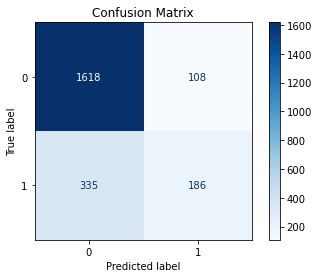

In [167]:
cm_test=confusion_matrix(ytest, grid.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=grid.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#### 4.3 SVC — поиск лучших параметров

In [62]:
svc = SVC(class_weight='balanced', probability=True)  # balanced — при дисбалансе классов

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['poly'],
    'gamma': ['scale']
}

svc_grid = GridSearchCV(
    svc,
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=3,  # Показывает каждую комбинацию и прогресс
    return_train_score=True
)
svc_grid.fit(Xtrain, ytrain)

# Выводим все результаты в читабельном виде
for mean_score, params in zip(svc_grid.cv_results_['mean_test_score'], svc_grid.cv_results_['params']):
    print(f"f1: {mean_score:.4f} | {params}")

print("Лучшие параметры:", svc_grid.best_params_)
print("Лучший F1:", svc_grid.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
f1: 0.1494 | {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
f1: 0.0461 | {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
f1: 0.1366 | {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
f1: 0.2454 | {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
f1: 0.3137 | {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Лучшие параметры: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Лучший F1: 0.3137237972362545


In [63]:
#param_grid = {
#    'C': [0.01, 0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly'],
#    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
#}

In [64]:
# Предсказания на тесте
y_pred = svc_grid.predict(Xtest)
y_proba = svc_grid.predict_proba(Xtest)[:, 1]

# Метрики
print("\nМетрики на тесте:")
print("Precision:", precision_score(ytest, y_pred))
print("Recall:", recall_score(ytest, y_pred))
print("F1-score:", f1_score(ytest, y_pred))
#print("ROC-AUC:", roc_auc_score(ytest, y_proba))

# Полный отчёт
print("\nClassification report:")
print(classification_report(ytest, y_pred))


Метрики на тесте:
Precision: 0.7285714285714285
Recall: 0.19577735124760076
F1-score: 0.30862329803328287

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1726
           1       0.73      0.20      0.31       521

    accuracy                           0.80      2247
   macro avg       0.76      0.59      0.59      2247
weighted avg       0.78      0.80      0.75      2247



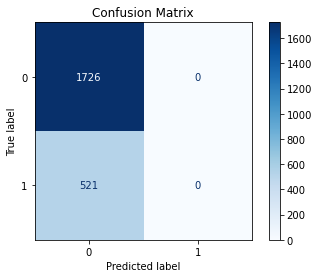

In [65]:
cm_test=confusion_matrix(ytest, svc_grid.predict(X_test_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svc_grid.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Вывод:** Регулязация с параметром C=100 и полиномильаным ядром повысило метрику F1 до 0.31 на тестовой выборке (было на порядок меньше). Но сами результаты мне не нравятся.\
Модель явно **перекошена в сторону предсказания класса 0**.

**Примечание**: подбор порога вероятности для разделения классов делать не стал, так как компьютер требет много ресурсов на повторную оптимизацию

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

#### 5.1 Посмотрим значения F1 на тестовой выборке в TrainData
1. 0.58  ---   K-nn при N=30     
2. 0.64  ---   LogisticRegression при C= 100  penalty='l1'
3. 0.31  ---   SVC   'C': 100, 'gamma': 'scale', 'kernel': 'poly'


**Лучшая модель - LogisticRegression** (F1=0.64) при C= 100  penalty='l1'

In [168]:
# разобьем отложенную выборку на признаки и целевые значения
Xval=Xtestdata.drop('target', axis=1)
yval=Xtestdata['target']

In [169]:
Xval.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933


In [170]:
# применяем трансформацию из пункта 4.1
X_val_norm = pd.DataFrame(scaler.transform(Xval), columns=Xval.columns)

In [175]:
# применяем к ней модель LogisticRegression при C= 100 penalty='l1' из пункта 4.2
# Предсказания на тесте
y_pred_val = best_logreg_model.predict(Xval)
y_proba_val = best_logreg_model.predict_proba(Xval)[:, 1]

# Метрики
print("\nМетрики на отложенной выборке:")
print("Precision:", precision_score(yval, y_pred_val))
print("Recall:", recall_score(yval, y_pred_val))
print("F1-score:", f1_score(yval, y_pred_val))

# Полный отчёт
print("\nClassification report:")
print(classification_report(yval, y_pred_val))


Метрики на отложенной выборке:
Precision: 0.6721763085399449
Recall: 0.41567291311754684
F1-score: 0.5136842105263157

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1913
           1       0.67      0.42      0.51       587

    accuracy                           0.82      2500
   macro avg       0.76      0.68      0.70      2500
weighted avg       0.80      0.82      0.80      2500



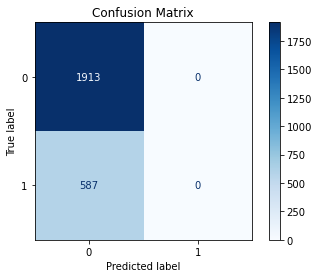

In [174]:
cm_val=confusion_matrix(yval, best_logreg_model.predict(X_val_norm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=best_logreg_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [179]:
# Получаем гиперпараметры модели для проверки
params = best_logreg_model.get_params()
print(params)

{'C': 100, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


**Вывод**: лучшая модель также провалили тесты на огтложенной выборке — **модель также перекошена в сторону предсказания класса 0.**

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

#### 6.1 Ищем оптимальное значение 𝛼 на обучающей  выборке 

In [187]:
Xtrain = pd.read_csv("TrainData.csv")
# разобьем обучающую выборку на признаки и целевые значения
Xtrain_full=Xtrain.drop('target', axis=1)
ytrain_full=Xtrain['target']

In [189]:
# обработаем снова признаки
Xtrain['f7'] = Xtrain['f7'].fillna(mean_f7)
Xtrain['f2'] = Xtrain['f2'].fillna(mean_f2)

In [190]:
Xtrain = Xtrain.dropna(subset=['f11'])

In [192]:
X_train=Xtrain.drop('target', axis=1)
y_train=Xtrain['target']

In [194]:
# применяем трансформацию
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [195]:
import numpy as np

# у нас есть:
# knn и best_logreg_model — обученные модели
# X_train_norm, y_train — обучающая выборка

# Получаем вероятности классов от обеих моделей
knn_probs = knn.predict_proba(X_train_norm)[:, 1]
logreg_probs = best_logreg_model.predict_proba(X_train_norm)[:, 1]

# Подбор alpha на тестовой выборке Xtrain
alphas = np.linspace(0, 1, 101)  # 0.00, 0.01, ..., 1.00
best_alpha = None
best_score = -np.inf

for alpha in alphas:
    blended_probs = alpha * knn_probs + (1 - alpha) * logreg_probs
    blended_preds = (blended_probs >= 0.5).astype(int)  # порог 0.5
    score = f1_score(y_train, blended_preds)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha

print(f"Лучшее alpha: {best_alpha:.2f} с F1-метрикой {best_score:.4f}")

Лучшее alpha: 0.99 с F1-метрикой 0.8894


#### 6.2  Создадим ансамблевое предсказание с найденной alpha

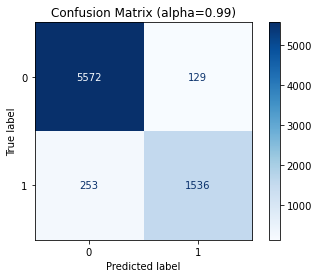

In [210]:
# Предсказания для обучающей выборки с лучшей alpha
knn_probs_train = knn.predict_proba(X_train_norm)[:, 1]
logreg_probs_train = best_logreg_model.predict_proba(X_train_norm)[:, 1]

blended_probs_train = best_alpha * knn_probs_train + (1 - best_alpha) * logreg_probs_train
blended_peds_train = (blended_probs_train >= 0.5).astype(int)

# Матрица сопряжённости
cm_train = confusion_matrix(y_train, blended_peds_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (alpha={best_alpha:.2f})")
plt.show()

In [211]:
# Полный отчёт
print("\nClassification report:")
print(classification_report(y_train, blended_peds_train))


Classification report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5701
           1       0.92      0.86      0.89      1789

    accuracy                           0.95      7490
   macro avg       0.94      0.92      0.93      7490
weighted avg       0.95      0.95      0.95      7490



**Промежуточные выводы:**\
Использование ансамбля на полной обучающей выборке показывает, что модель смогла найти 86% всех реальных объектов класса 1. \
**Это очень хороший результат, похожий не неправду**\
Проверим на валидационной выборке\
При этом alfa равна 0.99. Что означает, что по факту используется K-NN модель с n=30

#### 6.3 Проверка ансаблевой модели на валидационной выборке

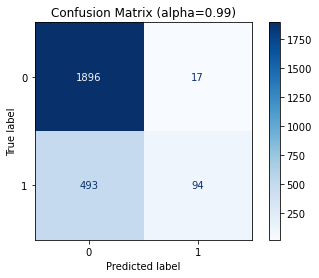

In [212]:
# Предсказания для валидационной выборки с лучшей alpha
knn_probs_val = knn.predict_proba(X_val_norm)[:, 1]
logreg_probs_val = best_logreg_model.predict_proba(X_val_norm)[:, 1]

blended_probs_val = best_alpha * knn_probs_val + (1 - best_alpha) * logreg_probs_val
blended_preds_val = (blended_probs_val >= 0.5).astype(int)

# Матрица сопряжённости
cm_val = confusion_matrix(yval, blended_preds_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (alpha={best_alpha:.2f})")
plt.show()

In [213]:
# Полный отчёт
print("\nClassification report:")
print(classification_report(yval, blended_preds_val))


Classification report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1913
           1       0.85      0.16      0.27       587

    accuracy                           0.80      2500
   macro avg       0.82      0.58      0.58      2500
weighted avg       0.81      0.80      0.74      2500



**Предварительные выводы**\
Ансамблевая модель переобучилась на обучающей выборке.\
Она смогла найти только 16% (Recall=0.16) от всех реальных объектов класса 1. Это говорит о том, что модель массово ошибочно классифицирует объекты класса 1 как класс 0.\
Низкий показатель Recall для класса 1 указывает на то, что модель не смогла обучиться распознавать важные признаки этого класса.

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [68]:
# Ваш текст здесь

1. Я использовал нормализацию, регуляризацию, взвешиание и балансировку весов\
2. На тестовых данных удалось получить F1 вплоть до 0.88.  При этом фактически использовалась только одна модель KNN\
3. F1-метрика на отложенной выборке крайне низка = 0.27\
4. Модель переобучилась на обучающей выборке и имеет низкую обобщающую сопособность.Скорей всего это связано с сильным дисбалансом.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.

**Попутный вывод**: не удалось полноценно провести поиск по сетке для SCV-модели.  Расчеты не завершались , хотя потратил много часов. Возможно это дало бы другой результат\
**Использование SCV черзвычайно затратно по высилительным ресурсам**, возможно я проверю этй версию позже на платных мощностях Colab Google